# **<span style="color:#0047AB; font-family: Arial, sans-serif;">OASIS INFOBYTE DATASCIENCE INTERN</span>**

## **<span style="color:#FF0000; font-family: Arial, sans-serif;">Task-4: EMAIL SPAM DETECTION WITH MACHINE LEARNING</span>**

### **Name:** Miraj Deep Bhandari

## **<span style="color:#00A300; font-family: Arial, sans-serif;">Problem Description</span>**

The project aims to develop a machine learning model for classifying emails into two categories: "spam" and "non-spam." The goal is to enable the model to distinguish between unwanted and legitimate emails, thereby enhancing email security and user experience.

## **<span style="color:#AA00FF; font-family: Arial, sans-serif;">Objective</span>**

My goal is to create a machine learning model that can analyze email content and accurately classify emails into one of two categories: "spam" or "non-spam." I want the model to learn patterns and relationships within the email data so that it can predict whether an email is spam or non-spam correctly. This model will be a valuable tool for enhancing email security and user experience by filtering out unwanted spam emails from users' inboxes.

![mail.png](https://geekflare.com/wp-content/uploads/2022/03/spamemailsolution.png)


## <span style="color:#FF5733;">Importing the Dependencies</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



## <span style="color:#FF5733;">Reading the CSV File</span>

In [2]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



## <span style="color:#FF5733;">Inspecting the Data Types of the Features</span>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB




## <span style="color:#FF5733;">Feature Selection (Dropping the Unnecessary columns)</span>


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)



## <span style="color:#FF5733;">Checking for Null Values</span>


In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64



## <span style="color:#FF5733;">Checking for Duplicates Rows</span>


In [7]:
df.duplicated().sum()

403

In [8]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear




## <span style="color:#FF5733;">Removing The Duplicated Rows</span>


In [9]:
df.drop_duplicates(inplace=True)
print("the no of duplicted rows are:",df.duplicated().sum())

the no of duplicted rows are: 0




## <span style="color:#FF5733;">Renaming the Columns Title</span>


In [10]:
col = {
    'v1': 'Mail_Type',
    'v2': 'Mail'
}

# Use the rename function with the dictionary
df.rename(columns=col, inplace=True)
df.head()

,Mail_Type,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## <span style="color:#FF5733;">Visualizing the target columns values in pie and bar charts</span>

ham     4516
spam     653
Name: Mail_Type, dtype: int64


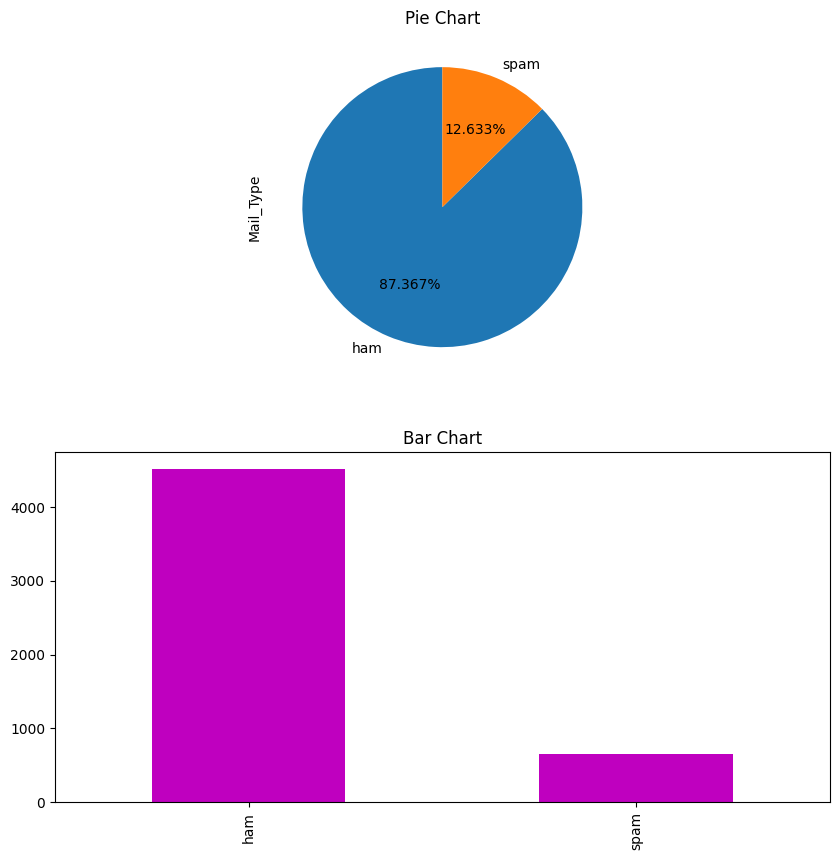

In [11]:
print(df['Mail_Type'].value_counts())
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax=ax.flatten()
# Pie chart
df['Mail_Type'].value_counts().plot(kind='pie', autopct="%.3f%%", ax=ax[0],startangle=90)
ax[0].set_title('Pie Chart')

# Bar chart
df['Mail_Type'].value_counts().plot(kind='bar', ax=ax[1],color='m')
ax[1].set_title('Bar Chart')

plt.show()

## <span style="color:#FF5733;">Filtering the Mail by applying regular expressions,stop words and word stemming</span>

In [12]:

stemmer = PorterStemmer()
words = stopwords.words("english")
words.extend(['a','an','the'])
df['Mail'] = df['Mail'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
df

,Mail_Type,Mail
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though
...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...
5568,ham,b go esplanad fr home
5569,ham,piti mood suggest
5570,ham,guy bitch act like interest buy someth els nex...


## <span style="color:#FF5733;">Executing a Train-Test Split, Applying Logistic Regression, and Evaluating Accuracy</span>

In [13]:

log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english")

X = df['Mail']
Y = df['Mail_Type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=500)),
                     ('clf', LogisticRegression(random_state=0))])

# #Training model
model = pipeline.fit(X_train, y_train)

In [14]:

predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))


0.9561855670103093


## <span style="color:#FF5733;">Executing a Train-Test Split, Applying DecisionTreeClassifier, and Evaluating Accuracy</span>

In [15]:

 decision_tree = DecisionTreeClassifier(random_state=0)

 vectorizer = TfidfVectorizer(stop_words="english")

 X = df['Mail']
 Y = df['Mail_Type']

 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

 # #Creating Pipeline
 pipeline_ = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=500)),
                     ('clf', DecisionTreeClassifier(random_state=0))])


  # #Training model
model_dt = pipeline_.fit(X_train, y_train)

In [16]:

predict_news_cat = model_dt.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))

0.9639175257731959


## <span style="color:#FF5733;">Executing a Train-Test Split, Applying RandomForestClassifier, and Evaluating Accuracy</span>

In [17]:

# Create a RandomForestClassifier
random_forest = RandomForestClassifier(random_state=0)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")

X = df['Mail']
Y = df['Mail_Type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

# Create the pipeline with Random Forest classifier
pipeline_rf = Pipeline([
    ('vect', vectorizer),
    ('chi', SelectKBest(chi2, k=500)),
    ('clf', random_forest)  # Use the Random Forest classifier
])

model_rf = pipeline_rf.fit(X_train, y_train)


In [18]:
# Evaluate the model on the test data
accuracy = model_rf.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy: {accuracy}")


Random Forest Classifier Accuracy: 0.9768041237113402


## <span style="color:#FF5733;">Executing a Train-Test Split, Applying XGBClassifier, and Evaluating Accuracy</span>

In [19]:
# Split the data into features (X) and target (y)
X = df['Mail']
y = df['Mail_Type']

# Encode 'ham' as 0 and 'spam' as 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.15, random_state=0)

# Create the pipeline with XGBoost classifier
pipeline_xgb = Pipeline([
    ('vect', vectorizer),
    ('chi', SelectKBest(chi2, k=500)),
    ('clf', XGBClassifier(random_state=0))  # Use the XGBoost classifier
])

model_xgb = pipeline_xgb.fit(X_train, y_train_encoded)



In [20]:
# Evaluate the model on the test data
accuracy = model_xgb.score(X_test, y_test_encoded)
print(f"XGBoost Classifier Accuracy: {accuracy}")

XGBoost Classifier Accuracy: 0.9729381443298969


## <span style="color:#FF5733;">Conducting Hyperparameter Tuning for the XGBClassifier and Assessing Optimal Parameters and Accuracy</span>

In [21]:

# Split the data into features (X) and target (y)
X = df['Mail']
y = df['Mail_Type']

# Encode 'ham' as 0 and 'spam' as 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")  # Adjust parameters as needed

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Use SelectKBest with chi-squared to select the top 500 features
k_best = SelectKBest(chi2, k=500)
X_tfidf_kbest = k_best.fit_transform(X_tfidf, y_encoded)

# Split the TF-IDF vectors and target into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_tfidf_kbest, y_encoded, test_size=0.15, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],  
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  #
    'min_child_weight': [1, 2, 3, 4], 
}

# Create an XGBoost model

xgb_model = XGBClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the random search for hyperparameters
random_search.fit(X_train, y_train_encoded)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_encoded = best_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.3}
Accuracy: 0.9716494845360825


## <span style="color:#FF5733;">Choosing the Final Best Model as Random Forest Classifier </span>

In [22]:

# Create a RandomForestClassifier
random_forest = RandomForestClassifier(random_state=0)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")

X = df['Mail']
Y = df['Mail_Type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

# Create the pipeline with Random Forest classifier
pipeline_rf = Pipeline([
    ('vect', vectorizer),
    ('chi', SelectKBest(chi2, k=500)),
    ('clf', random_forest)  # Use the Random Forest classifier
])

model_rf = pipeline_rf.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model_rf.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy: {accuracy}")

Random Forest Classifier Accuracy: 0.9768041237113402


## <span style="color:#FF5733;">Observing the Model Performance </span>

In [23]:
# confusion matrix and classification report(precision, recall, F1-score)
import numpy as np
ytest = np.array(y_test)
print(classification_report(model_rf.predict(X_test),ytest))
conf_matrix=confusion_matrix(model_rf.predict(X_test),ytest)
print(confusion_matrix(model_rf.predict(X_test),ytest))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       688
        spam       0.84      0.99      0.91        88

    accuracy                           0.98       776
   macro avg       0.92      0.98      0.95       776
weighted avg       0.98      0.98      0.98       776

[[671  17]
 [  1  87]]



## <span style="color:#FF5733;">Confusion Matrix</span>

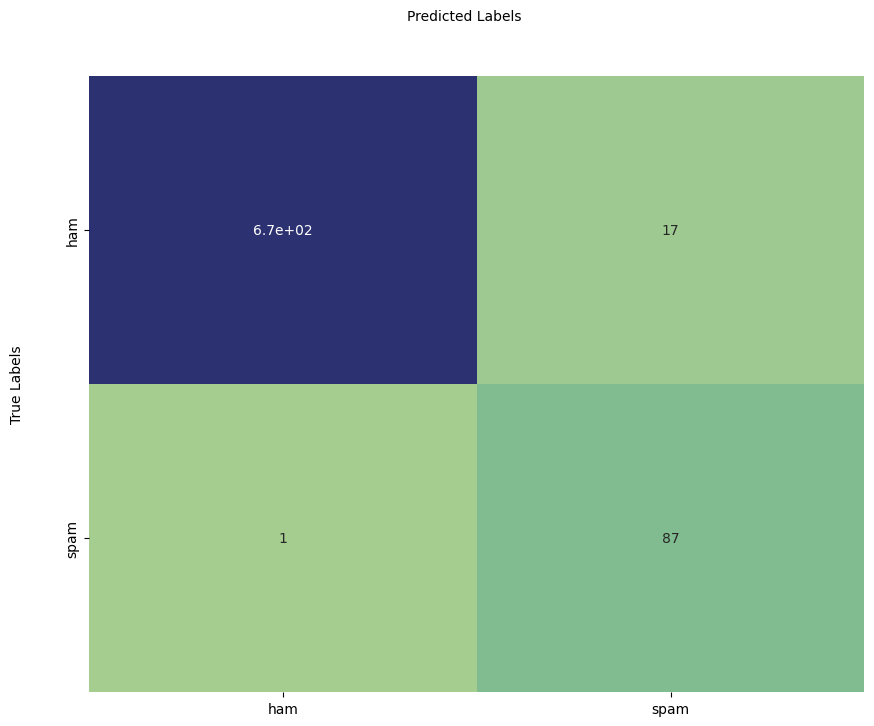

In [24]:
import seaborn as sns
class_names = ['ham','spam']
# Make predictions using the model

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='crest', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.figtext(0.5, 0.95, 'Predicted Labels', ha='center')

plt.ylabel('True Labels',labelpad=30)

plt.show()



## <span style="color:#FF5733;">Assessing the Model's Cross Validation Score</span>

In [25]:
# Initialize the logistic regression model with an increased max_iter
from sklearn.model_selection import cross_val_score

k = 10
cross_val_scores = cross_val_score(pipeline_rf, X, Y, cv=k)

print("Mean accuracy:", cross_val_scores.mean())

Mean accuracy: 0.9750438576762178



## <span style="color:#FF5733;">Conducting tests to determine whether newly received emails are categorized as spam or not</span>

In [26]:
# copy and paste this below mail and check its spam or not
"""
Free entry in FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 084785h3rover18's
"""

mail = input("Enter Your Mail = ")
mail_data = {'predict_mail':[mail]}
mail_data_df = pd.DataFrame(mail_data)

predict_mail_cat = model_rf.predict(mail_data_df['predict_mail'])
print("\n")
print("\n")
print("Predicted mail category = ",predict_mail_cat[0])

Enter Your Mail = Free entry in FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 084785h3rover18's




Predicted mail category =  spam



## <span style="color:black;">...............................Thank You !! .........................</span>
